# Exploraci√≥n de datos y preparaci√≥n (Capa Plata)

En esta clase trabajaremos con los datos meteorol√≥gicos previamente filtrados por estaci√≥n (Capa Bronce) para realizar una primera exploraci√≥n estructurada. El objetivo es transformar los datos crudos en un conjunto limpio, validado y enriquecido, listo para su an√°lisis.

## Objetivos de la clase:
- Identificar tipos de an√°lisis exploratorio.
- Aplicar transformaciones b√°sicas en la Capa Plata.
- Detectar y tratar valores nulos y at√≠picos.
- Generar estad√≠sticas descriptivas por estaci√≥n y fecha.
- Visualizar las principales variables meteorol√≥gicas.
- Exportar el dataset en m√∫ltiples formatos para su posterior an√°lisis.

El foco estar√° puesto en la limpieza, validaci√≥n, estandarizaci√≥n y normalizaci√≥n de datos para facilitar su consumo en dashboards, an√°lisis y modelos posteriores.


## Importaci√≥n de librer√≠as y configuraci√≥n de paths

In [1]:
# Importar librer√≠as necesarias
import os
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from windrose import WindroseAxes
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Definir rutas para capas Bronce y Plata y Diccionario
BRONCE_DIR = Path('../data/bronce/')
PLATA_DIR = Path('../data/plata/')
PLATA_DIR.mkdir(parents=True, exist_ok=True)
# Crear carpeta para faltantes si no existe
FALTANTES_DIR = Path('../data/faltantes/')
FALTANTES_DIR.mkdir(parents=True, exist_ok=True)
# Crear carpeta para guardar los metadatos
DICCIONARIO_DIR = Path('../data/diccionario/')
DICCIONARIO_DIR.mkdir(parents=True, exist_ok=True)

# Variable de la provincia para generar los metadatos
PROVINCIA = 'Misiones'

# Ajustar el ancho m√°ximo para impresi√≥n en consola
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 300)         # Ajustar a un ancho suficiente en consola
pd.set_option('display.max_colwidth', None) # Evitar recortes en contenido de celdas

print("Importaci√≥n de librer√≠as completada.")

Importaci√≥n de librer√≠as completada.


## Carga de archivos de todas las estaciones de la provincia seleccionada

In [2]:
# Cargar todos los archivos CSV de la capa Bronce, excluyendo procesados.csv en el ra√≠z
archivos = [
    archivo for archivo in BRONCE_DIR.rglob("*.csv")
    if archivo.name != "procesados.csv"
]

dfs = []
for archivo in archivos:
    df = pd.read_csv(archivo)
    df['estacion_archivo'] = archivo.stem  # Agregar nombre del archivo como identificador de estaci√≥n
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_estaciones = pd.concat(dfs, ignore_index=True)
print(df_estaciones)

          FECHA  HORA  TEMP  HUM     PNM   DD  FF         NOMBRE estacion_archivo
0       2112024     0   5.8   51  1012.4  320  37  CHAPELCO AERO         20241102
1       2112024     1   5.8   56  1013.3  300  30  CHAPELCO AERO         20241102
2       2112024     2   5.6   58  1014.6  300  17  CHAPELCO AERO         20241102
3       2112024     3   5.6   66  1014.1    0   0  CHAPELCO AERO         20241102
4       2112024     4   5.4   69  1014.4  250  19  CHAPELCO AERO         20241102
...         ...   ...   ...  ...     ...  ...  ..            ...              ...
19283  27112024    19  23.8   17  1008.9  340   9   NEUQUEN AERO         20241127
19284  27112024    20  22.2   23  1009.6  290   9   NEUQUEN AERO         20241127
19285  27112024    21  19.7   30  1010.6  230   7   NEUQUEN AERO         20241127
19286  27112024    22  20.4   22  1011.5  230   7   NEUQUEN AERO         20241127
19287  27112024    23  19.7   25  1012.2  230  19   NEUQUEN AERO         20241127

[19288 rows x 9

## Normalizaci√≥n y combinaci√≥n de fecha y hora

In [3]:
# Convertir FECHA (DDMMAAAA) a string y formatear como DDMMAAAA
df_estaciones['FECHA'] = df_estaciones['FECHA'].astype(str).str.zfill(8)

# Convertir a formato datetime (indicando el formato original)
df_estaciones['FECHA'] = pd.to_datetime(df_estaciones['FECHA'], format='%d%m%Y', errors='coerce')

# Asegurar que HORA est√° en n√∫mero entero (algunos datasets los tienen como string)
df_estaciones['HORA'] = df_estaciones['HORA'].astype(int)

# Crear columna combinada FECHA_HORA como datetime completo
df_estaciones['FECHA_HORA'] = df_estaciones['FECHA'] + pd.to_timedelta(df_estaciones['HORA'], unit='h')

# Verificamos el resultado
print(df_estaciones[['FECHA', 'HORA', 'FECHA_HORA']].head())

       FECHA  HORA          FECHA_HORA
0 2024-11-02     0 2024-11-02 00:00:00
1 2024-11-02     1 2024-11-02 01:00:00
2 2024-11-02     2 2024-11-02 02:00:00
3 2024-11-02     3 2024-11-02 03:00:00
4 2024-11-02     4 2024-11-02 04:00:00


## Guardar el archivo con los datos horarios de las estaciones de la provincia

In [4]:
archivo_horario = PLATA_DIR / "horario_archivo.csv"

# Guardar el archivo con datos horarios
df_estaciones.to_csv(archivo_horario, index=False)

print(f"Archivo horario exportado correctamente a:\n{archivo_horario}")
print(f"Filas: {len(df_estaciones)} ‚Äì Columnas: {len(df_estaciones.columns)}")
print("\nVista previa de datos horarios:")
print(df_estaciones.head(3))

Archivo horario exportado correctamente a:
../data/plata/horario_archivo.csv
Filas: 19288 ‚Äì Columnas: 10

Vista previa de datos horarios:
       FECHA  HORA  TEMP  HUM     PNM   DD  FF         NOMBRE estacion_archivo          FECHA_HORA
0 2024-11-02     0   5.8   51  1012.4  320  37  CHAPELCO AERO         20241102 2024-11-02 00:00:00
1 2024-11-02     1   5.8   56  1013.3  300  30  CHAPELCO AERO         20241102 2024-11-02 01:00:00
2 2024-11-02     2   5.6   58  1014.6  300  17  CHAPELCO AERO         20241102 2024-11-02 02:00:00


### Agrupaci√≥n diaria de variables por estaci√≥n

En esta secci√≥n agrupamos los datos meteorol√≥gicos por estaci√≥n y por fecha. 
Calculamos estad√≠sticas clave como temperatura, presi√≥n, humedad, direcci√≥n y velocidad del viento. 
Esto permite obtener un resumen diario limpio para cada estaci√≥n, facilitando su an√°lisis posterior.

In [5]:
# Agrupar por estaci√≥n y fecha para obtener valores resumen diarios
df_estaciones_group = df_estaciones.groupby(['NOMBRE', 'FECHA']).agg({
    'TEMP': ['mean', 'min', 'max'],
    'PNM': ['mean', 'min', 'max'],
    'HUM': ['mean', 'min', 'max'],
    'DD': 'mean',
    'FF': 'mean'
}).reset_index()

# Renombrar columnas para facilitar su uso
df_estaciones_group.columns = ['ESTACION', 'FECHA',
                               'TEMP_MEAN', 'TEMP_MIN', 'TEMP_MAX',
                               'PNM_MEAN', 'PNM_MIN', 'PNM_MAX',
                               'HUM_MEAN', 'HUM_MIN', 'HUM_MAX',
                               'WIND_DIR_MEAN', 'WIND_SPEED_MEAN']

print(df_estaciones_group)

          ESTACION      FECHA  TEMP_MEAN  TEMP_MIN  TEMP_MAX     PNM_MEAN  PNM_MIN  PNM_MAX   HUM_MEAN  HUM_MIN  HUM_MAX  WIND_DIR_MEAN  WIND_SPEED_MEAN
0    CHAPELCO AERO 2024-06-01   4.100000       1.8       6.6  1014.600000   1011.7   1018.1  76.375000       51       93     250.000000        25.458333
1    CHAPELCO AERO 2024-06-02   1.191667      -2.2       5.2  1026.175000   1019.1   1030.1  83.125000       57       99     137.083333         9.083333
2    CHAPELCO AERO 2024-06-03   2.833333      -1.7       4.8  1020.870833   1016.6   1028.9  65.458333       52       94      92.916667        14.041667
3    CHAPELCO AERO 2024-06-04   4.237500      -0.9      12.4  1014.525000   1011.8   1017.1  84.750000       63       98      52.916667         2.625000
4    CHAPELCO AERO 2024-06-05   6.883333       4.6       9.2  1009.800000   1008.4   1012.3  96.458333       94      100     162.916667         4.458333
..             ...        ...        ...       ...       ...          ...      ...

## Validaci√≥n estructural: detecci√≥n de duplicados

Antes de avanzar con el an√°lisis, verificamos si existen filas duplicadas por combinaci√≥n de estaci√≥n y fecha, lo cual indicar√≠a problemas en la agregaci√≥n de datos.

In [6]:
duplicados = df_estaciones_group.duplicated(subset=['ESTACION', 'FECHA']).sum()
print(f" Duplicados por estaci√≥n y fecha: {duplicados}")

 Duplicados por estaci√≥n y fecha: 0


## An√°lisis de cobertura temporal por estaci√≥n

In [7]:
# Crear rango completo de fechas
rango_fechas = pd.date_range(df_estaciones_group['FECHA'].min(), df_estaciones_group['FECHA'].max())

# Detectar d√≠as faltantes por estaci√≥n y exportar
for estacion in df_estaciones_group['ESTACION'].unique():
    fechas_est = pd.to_datetime(df_estaciones_group[df_estaciones_group['ESTACION'] == estacion]['FECHA'].unique())
    dias_faltantes = sorted(set(rango_fechas) - set(fechas_est))

    # Crear archivo por estaci√≥n
    nombre_archivo = FALTANTES_DIR / f'dias_faltantes_{estacion.replace(" ", "_").lower()}.txt'
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f"D√≠as faltantes para estaci√≥n: {estacion}\n")
        f.write(f"Total: {len(dias_faltantes)}\n\n")
        for dia in dias_faltantes:
            f.write(f"{dia.strftime('%Y-%m-%d')}\n")

    # Mostrar resumen por consola
    print(f" Estaci√≥n: {estacion}")
    print(f" D√≠as faltantes: {len(dias_faltantes)}")
    print(f" Archivo: {nombre_archivo.name}\n")

 Estaci√≥n: CHAPELCO AERO
 D√≠as faltantes: 4
 Archivo: dias_faltantes_chapelco_aero.txt

 Estaci√≥n: NEUQUEN AERO
 D√≠as faltantes: 4
 Archivo: dias_faltantes_neuquen_aero.txt



## Exploraci√≥n univariada de variables meteorol√≥gicas

A continuaci√≥n, se presentan histogramas para explorar la distribuci√≥n de variables meteorol√≥gicas clave. Esto permite identificar posibles sesgos, valores extremos o asimetr√≠as en la distribuci√≥n de cada variable.

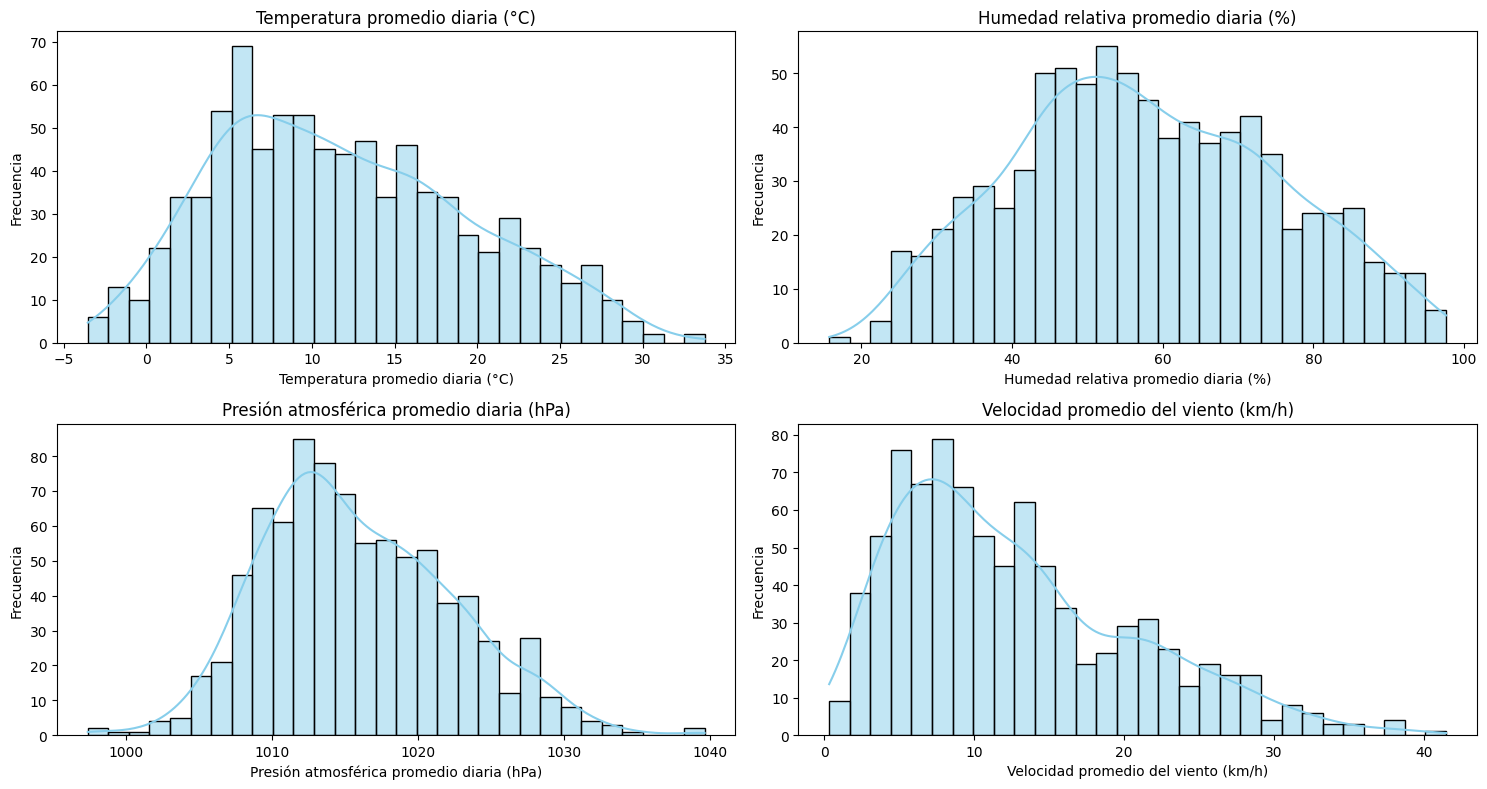

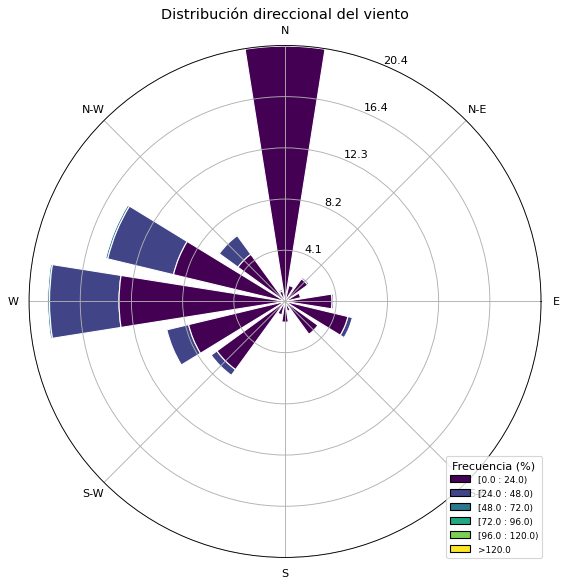

In [8]:
# Variables a graficar
variables_hist = {
    'TEMP_MEAN': 'Temperatura promedio diaria (¬∞C)',
    'HUM_MEAN': 'Humedad relativa promedio diaria (%)',
    'PNM_MEAN': 'Presi√≥n atmosf√©rica promedio diaria (hPa)',
    'WIND_SPEED_MEAN': 'Velocidad promedio del viento (km/h)'
}

# Crear subplots para los histogramas
plt.figure(figsize=(15, 8))
for i, (var, titulo) in enumerate(variables_hist.items(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_estaciones_group[var], kde=True, bins=30, color='skyblue')
    plt.title(titulo, fontsize=12)
    plt.xlabel(titulo)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear gr√°fico Windrose para WIND_DIR_MEAN
df_viento = df_estaciones[(df_estaciones['DD'] <= 360)]

ax = WindroseAxes.from_ax()
ax.bar(df_viento['DD'], df_viento['FF'], normed=True, opening=0.8, edgecolor='white')

# Ajustes de visualizaci√≥n
ax.set_title("Distribuci√≥n direccional del viento", fontsize=13)
ax.set_legend(loc='lower right', title="Frecuencia (%)", fontsize=9, title_fontsize=10, frameon=True)
plt.show()

## An√°lisis exploratorio ‚Äì valores m√°ximos, m√≠nimos, promedio diario

In [9]:
# Verificar valores inv√°lidos en DD (mayores a 360)
valores_dd_invalidos = df_estaciones[df_estaciones['DD'] > 360]['DD'].unique()
print("Valores inv√°lidos en DD (mayores a 360):", valores_dd_invalidos, "\n")

# Crear columna de fecha sin hora para agrupar
df_estaciones['FECHA_DIA'] = df_estaciones['FECHA'].dt.date

# Crear DD_VALID con NaN en valores > 360 (para excluir del promedio)
df_estaciones['DD_VALID'] = df_estaciones['DD'].where(df_estaciones['DD'] <= 360, pd.NA)

# Paso 3: Agrupar por estaci√≥n y d√≠a, y calcular estad√≠sticas
df_estaciones_group = df_estaciones.groupby(['NOMBRE', 'FECHA_DIA']).agg({
    'TEMP': ['mean', 'min', 'max'],
    'PNM': ['mean', 'min', 'max'],
    'HUM': ['mean', 'min', 'max'],
    'DD_VALID': ['mean'],       # Promedio con valores v√°lidos solamente
    'DD': ['min', 'max'],       # Para conservar min y max sin filtrar
    'FF': ['mean', 'min', 'max']
}).reset_index()

# Renombrar columnas para facilitar lectura
df_estaciones_group.columns = [
    'ESTACION', 'FECHA',
    'TEMP_MEAN', 'TEMP_MIN', 'TEMP_MAX',
    'PNM_MEAN', 'PNM_MIN', 'PNM_MAX',
    'HUM_MEAN', 'HUM_MIN', 'HUM_MAX',
    'WIND_DIR_MEAN',  # <- Esta es la media con valores v√°lidos
    'WIND_DIR_MIN', 'WIND_DIR_MAX',
    'WIND_SPEED_MEAN', 'WIND_SPEED_MIN', 'WIND_SPEED_MAX'
]

# Redondear solo las columnas *_MEAN a 1 decimal
cols_mean = ['TEMP_MEAN', 'PNM_MEAN', 'HUM_MEAN', 'WIND_DIR_MEAN', 'WIND_SPEED_MEAN']
df_estaciones_group[cols_mean] = df_estaciones_group[cols_mean].round(1)

# Vista previa
print(df_estaciones_group)


Valores inv√°lidos en DD (mayores a 360): [990] 

          ESTACION       FECHA  TEMP_MEAN  TEMP_MIN  TEMP_MAX  PNM_MEAN  PNM_MIN  PNM_MAX  HUM_MEAN  HUM_MIN  HUM_MAX  WIND_DIR_MEAN  WIND_DIR_MIN  WIND_DIR_MAX  WIND_SPEED_MEAN  WIND_SPEED_MIN  WIND_SPEED_MAX
0    CHAPELCO AERO  2024-06-01        4.1       1.8       6.6    1014.6   1011.7   1018.1      76.4       51       93          250.0             0           290             25.5               0              39
1    CHAPELCO AERO  2024-06-02        1.2      -2.2       5.2    1026.2   1019.1   1030.1      83.1       57       99          100.0             0           990              9.1               0              22
2    CHAPELCO AERO  2024-06-03        2.8      -1.7       4.8    1020.9   1016.6   1028.9      65.5       52       94           92.9             0           270             14.0               0              22
3    CHAPELCO AERO  2024-06-04        4.2      -0.9      12.4    1014.5   1011.8   1017.1      84.8       63  

## Visualizaci√≥n por estaci√≥n y por variable

Se generan gr√°ficos individuales para cada estaci√≥n meteorol√≥gica, mostrando la evoluci√≥n diaria de temperatura, presi√≥n, humedad y viento. 
Tambi√©n se incluye una visualizaci√≥n tipo Windrose para observar la distribuci√≥n de la direcci√≥n y velocidad del viento.


 Estaci√≥n: CHAPELCO AERO


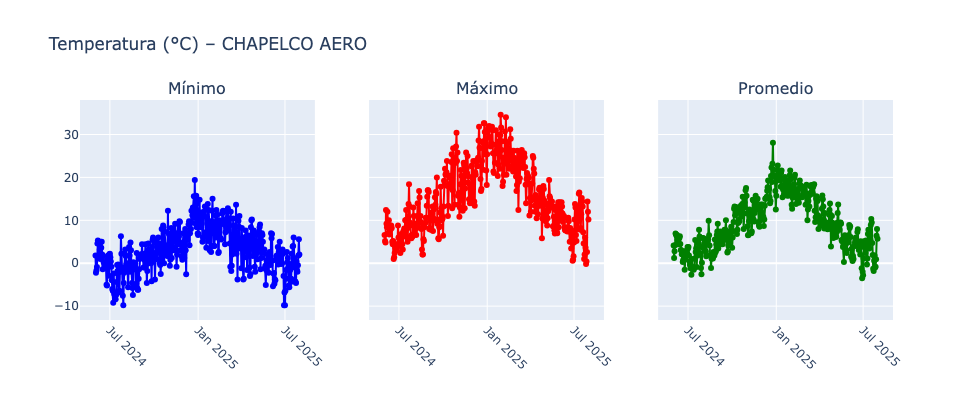

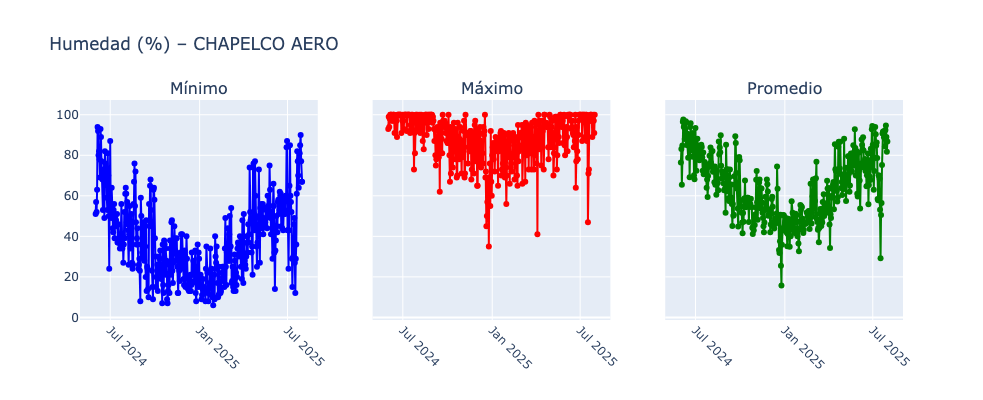

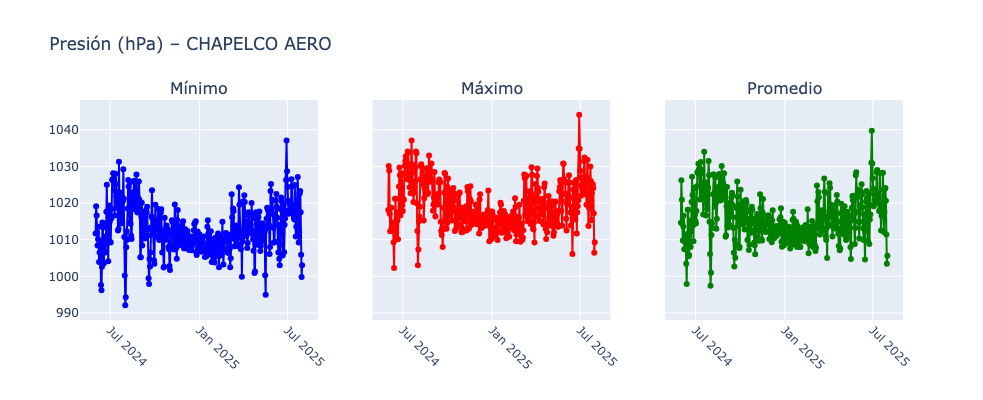

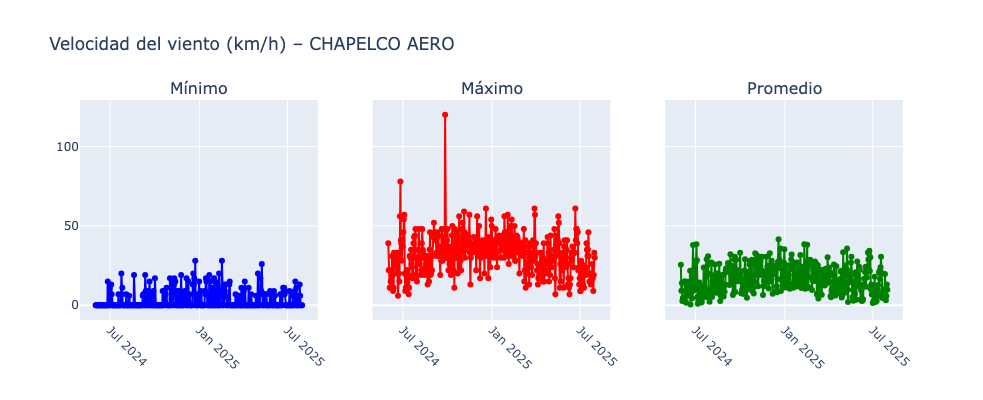

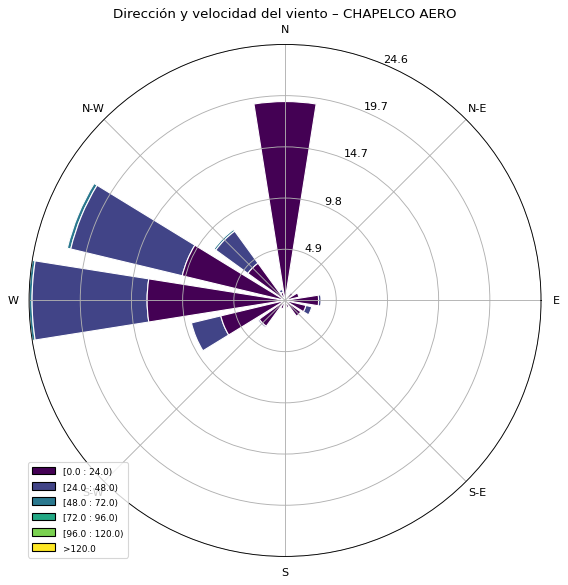


 Estaci√≥n: NEUQUEN AERO


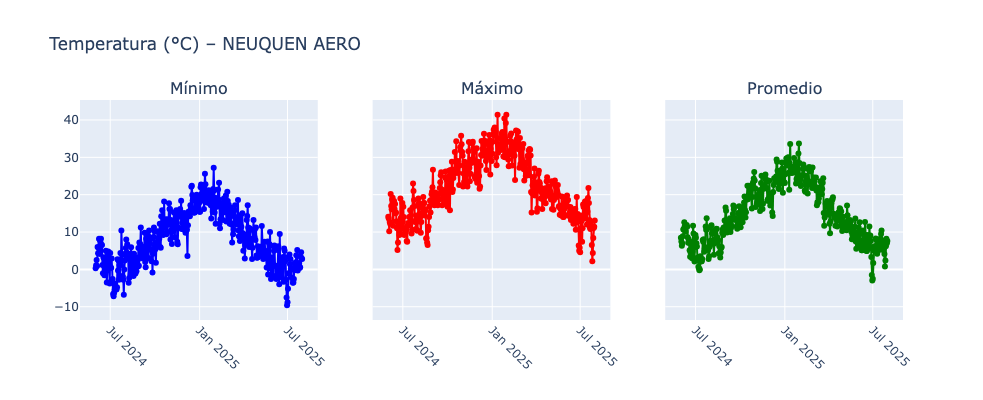

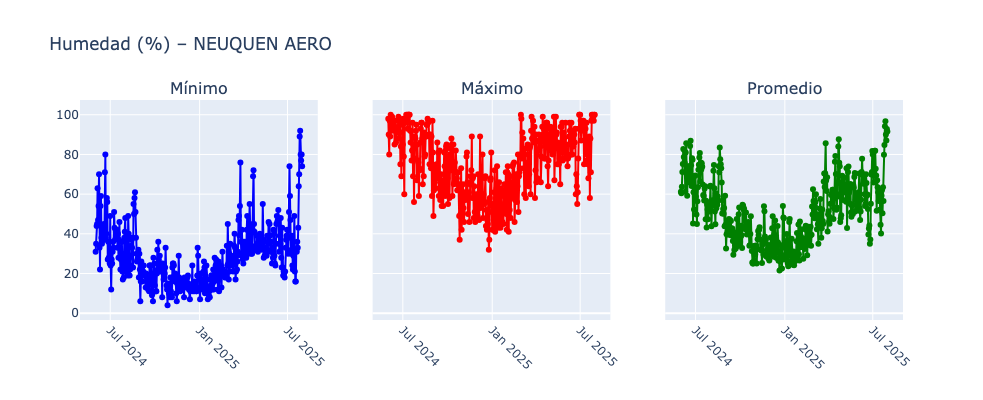

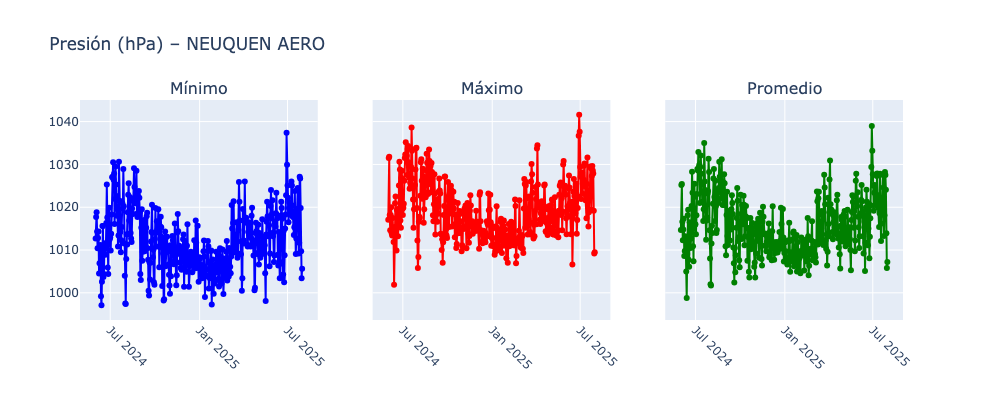

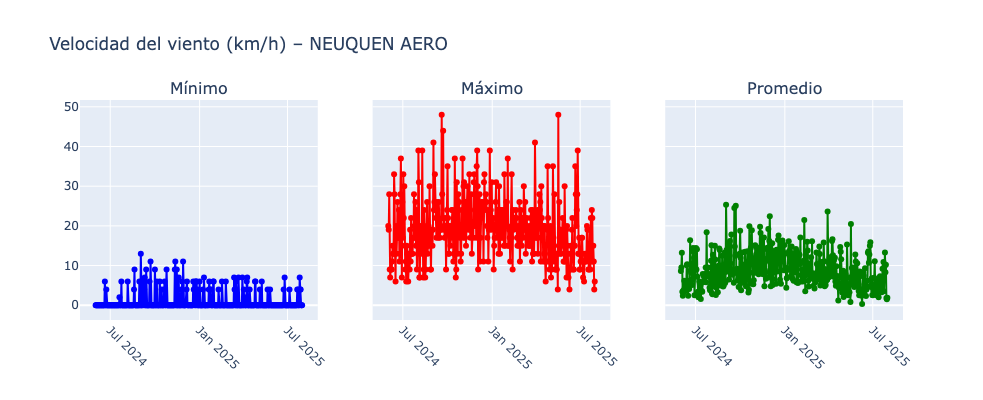

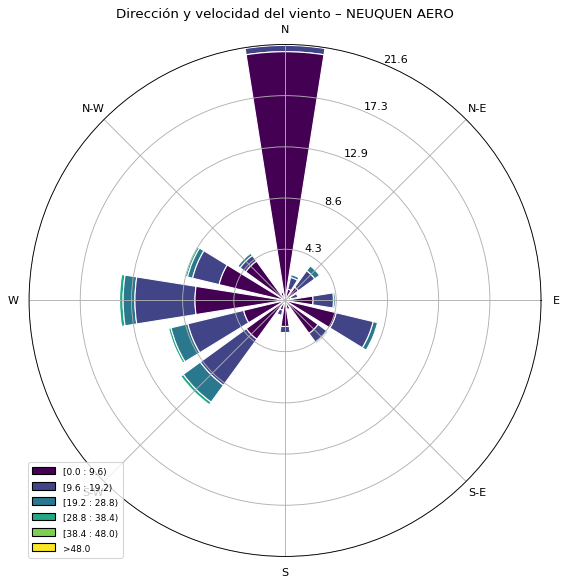

In [10]:
# Asegurar que FECHA est√© en datetime
df_estaciones_group['FECHA'] = pd.to_datetime(df_estaciones_group['FECHA'])

variables = {
    'TEMP': {'min': 'TEMP_MIN', 'mean': 'TEMP_MEAN', 'max': 'TEMP_MAX', 'label': 'Temperatura (¬∞C)'},
    'HUM': {'min': 'HUM_MIN', 'mean': 'HUM_MEAN', 'max': 'HUM_MAX', 'label': 'Humedad (%)'},
    'PNM': {'min': 'PNM_MIN', 'mean': 'PNM_MEAN', 'max': 'PNM_MAX', 'label': 'Presi√≥n (hPa)'},
    'WIND_SPEED': {'min': 'WIND_SPEED_MIN', 'mean': 'WIND_SPEED_MEAN', 'max': 'WIND_SPEED_MAX', 'label': 'Velocidad del viento (km/h)'}
}

# Recorrer estaciones
for estacion in df_estaciones_group['ESTACION'].unique():
    df_est_group = df_estaciones_group[df_estaciones_group['ESTACION'] == estacion]
    df_est_raw = df_estaciones[(df_estaciones['NOMBRE'] == estacion) & (df_estaciones['DD'] <= 360)]

    print(f"\n Estaci√≥n: {estacion}")

    # Una fila por variable (cada una con 3 columnas: min, mean, max)
    for var, datos in variables.items():
        fig = make_subplots(
            rows=1, cols=3,
            shared_yaxes=True,
            subplot_titles=("M√≠nimo", "M√°ximo", "Promedio")
        )

        colores = {
            'min': 'blue',
            'max': 'red',
            'mean': 'green'
        }
        
        for i, tipo in enumerate(['min', 'max', 'mean']):
            fig.add_trace(
                go.Scatter(
                    x=df_est_group['FECHA'],
                    y=df_est_group[datos[tipo]],
                    mode='lines+markers',
                    name=f"{datos['label']} ‚Äì {tipo}",
                    line=dict(color=colores[tipo]),
                    hovertemplate="Fecha: %{x|%d-%m-%Y}<br>Valor: %{y:.2f}<extra></extra>"
                ),
                row=1, col=i + 1
            )

        fig.update_layout(
            title_text=f"{datos['label']} ‚Äì {estacion}",
            height=400,
            showlegend=False
        )
        fig.update_xaxes(tickangle=45)
        fig.show()

    # Graficar rosa del viento con matplotlib (se mantiene igual)
    ax = WindroseAxes.from_ax()
    ax.bar(df_est_raw['DD'], df_est_raw['FF'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title(f'Direcci√≥n y velocidad del viento ‚Äì {estacion}', fontsize=12)
    ax.set_legend()
    plt.show()


## Normalizaci√≥n Min-Max: ¬øPor qu√© la aplicamos?

Cuando trabajamos con m√∫ltiples variables meteorol√≥gicas ‚Äîcomo temperatura, presi√≥n, humedad, direcci√≥n y velocidad del viento‚Äî nos enfrentamos a un problema: **cada una est√° en una escala diferente**.

- Temperatura: 5‚ÄØ¬∞C a 35‚ÄØ¬∞C  
- Presi√≥n atmosf√©rica: 1000 a 1030 hPa  
- Humedad relativa: 40‚ÄØ% a 100‚ÄØ%  
- Direcci√≥n del viento: 0¬∞ a 360¬∞  
- Velocidad del viento: 0 a 30 km/h  

Estas diferencias pueden dificultar tanto la comparaci√≥n visual como el an√°lisis conjunto. Para resolverlo, aplicamos la **normalizaci√≥n Min-Max**, que transforma cada valor al rango [0,‚ÄØ1] manteniendo su proporcionalidad, mediante la siguiente f√≥rmula:

$$
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Donde:  
- $x$ es el valor original  
- $x_{\text{min}}$ es el m√≠nimo observado de la variable  
- $x_{\text{max}}$ es el m√°ximo observado de la variable  

### ¬øQu√© logramos con esto?

- Facilitar la **comparaci√≥n visual** entre variables heterog√©neas  
- Preparar los datos para **an√°lisis multivariado** (como clustering o reducci√≥n de dimensiones)  
- Evitar que variables con mayor escala **dominen** sobre otras en modelos o gr√°ficos  
- Posibilitar visualizaciones integradas, como **gr√°ficos radar o l√≠neas normalizadas**

> Esta transformaci√≥n no modifica la forma de la distribuci√≥n, sino √∫nicamente su escala, lo que permite trabajar todas las variables en igualdad de condiciones.


In [11]:
# Verificar cantidad de valores nulos antes del rellenado
print("üîç Valores nulos por columna antes del forward fill:\n")
print(df_estaciones_group.isnull().sum())

# Rellenar valores nulos con forward fill
df_estaciones_group.ffill(inplace=True)

# Definir columnas *_MEAN para normalizar
cols_mean = ['TEMP_MEAN', 'PNM_MEAN', 'HUM_MEAN', 'WIND_DIR_MEAN', 'WIND_SPEED_MEAN']

# Aplicar normalizaci√≥n Min-Max y mostrar ejemplos
for col in cols_mean:
    min_val = df_estaciones_group[col].min()
    max_val = df_estaciones_group[col].max()
    df_estaciones_group[col + '_NORM'] = (df_estaciones_group[col] - min_val) / (max_val - min_val)
    
    # Imprimir resumen
    print(f"\nüîπ Normalizaci√≥n de {col}:")
    print(f"   Valor m√≠nimo: {min_val:.2f}, m√°ximo: {max_val:.2f}")
    print(df_estaciones_group[[col, col + '_NORM']].head(5))

üîç Valores nulos por columna antes del forward fill:

ESTACION           0
FECHA              0
TEMP_MEAN          0
TEMP_MIN           0
TEMP_MAX           0
PNM_MEAN           0
PNM_MIN            0
PNM_MAX            0
HUM_MEAN           0
HUM_MIN            0
HUM_MAX            0
WIND_DIR_MEAN      0
WIND_DIR_MIN       0
WIND_DIR_MAX       0
WIND_SPEED_MEAN    0
WIND_SPEED_MIN     0
WIND_SPEED_MAX     0
dtype: int64

üîπ Normalizaci√≥n de TEMP_MEAN:
   Valor m√≠nimo: -3.50, m√°ximo: 33.70
   TEMP_MEAN  TEMP_MEAN_NORM
0        4.1        0.204301
1        1.2        0.126344
2        2.8        0.169355
3        4.2        0.206989
4        6.9        0.279570

üîπ Normalizaci√≥n de PNM_MEAN:
   Valor m√≠nimo: 997.40, m√°ximo: 1039.70
   PNM_MEAN  PNM_MEAN_NORM
0    1014.6       0.406619
1    1026.2       0.680851
2    1020.9       0.555556
3    1014.5       0.404255
4    1009.8       0.293144

üîπ Normalizaci√≥n de HUM_MEAN:
   Valor m√≠nimo: 15.70, m√°ximo: 97.60
   HUM_MEAN 

## Exportaci√≥n a Capa Plata

In [12]:
# Exportar la Capa Plata:
df_estaciones_group.to_csv(PLATA_DIR / 'dataset_plata_inicial.csv', index=False)

# Imprimir resumen de exportaci√≥n
print("\n Archivos exportados en formato Capa Plata:")
print(f" - CSV:     {PLATA_DIR / 'dataset_plata_inicial.csv'}")
print(f"\n Filas exportadas: {len(df_estaciones_group)}")
print(f" Columnas exportadas: {len(df_estaciones_group.columns)}")
print(f"\n Vista previa:")
print(df_estaciones_group.head(3))



 Archivos exportados en formato Capa Plata:
 - CSV:     ../data/plata/dataset_plata_inicial.csv

 Filas exportadas: 844
 Columnas exportadas: 22

 Vista previa:
        ESTACION      FECHA  TEMP_MEAN  TEMP_MIN  TEMP_MAX  PNM_MEAN  PNM_MIN  PNM_MAX  HUM_MEAN  HUM_MIN  HUM_MAX  WIND_DIR_MEAN  WIND_DIR_MIN  WIND_DIR_MAX  WIND_SPEED_MEAN  WIND_SPEED_MIN  WIND_SPEED_MAX  TEMP_MEAN_NORM  PNM_MEAN_NORM  HUM_MEAN_NORM  WIND_DIR_MEAN_NORM  WIND_SPEED_MEAN_NORM
0  CHAPELCO AERO 2024-06-01        4.1       1.8       6.6    1014.6   1011.7   1018.1      76.4       51       93          250.0             0           290             25.5               0              39        0.204301       0.406619       0.741148            0.774326              0.611650
1  CHAPELCO AERO 2024-06-02        1.2      -2.2       5.2    1026.2   1019.1   1030.1      83.1       57       99          100.0             0           990              9.1               0              22        0.126344       0.680851       0.82

## Generaci√≥n de metadatos y documentaci√≥n del dataset

Para garantizar la trazabilidad y comprensi√≥n del dataset procesado, se generan tres archivos complementarios:

- **Metadatos de variables**: resumen estad√≠stico por columna (tipo, nulos, valores √∫nicos, m√≠nimos, m√°ximos, etc.).
- **Diccionario de variables**: descripci√≥n manual del significado, unidad y observaciones de cada campo.
- **Metadatos generales**: informaci√≥n sobre la fuente, cobertura geogr√°fica y temporal, formato, y responsable del procesamiento.

Estos archivos permiten documentar correctamente la Capa Plata, facilitando su interpretaci√≥n y reutilizaci√≥n en etapas posteriores del pipeline de datos.

In [13]:
# --- Funci√≥n para generar metadatos por columna ---
def generar_metadatos(df):
    metadatos = []
    for col in df.columns:
        serie = df[col]
        tipo = serie.dtype
        no_nulos = serie.notnull().sum()
        nulos = serie.isnull().sum()
        pct_nulos = (nulos / len(serie)) * 100
        unicos = serie.nunique()
        ejemplo = serie.dropna().iloc[0] if no_nulos > 0 else None
        try:
            minimo = serie.min()
            maximo = serie.max()
        except:
            minimo, maximo = None, None

        metadatos.append({
            'Columna': col,
            'Tipo de dato': str(tipo),
            'Valores no nulos': no_nulos,
            'Valores nulos': nulos,
            '% Nulos': round(pct_nulos, 2),
            'Valor m√≠nimo': minimo,
            'Valor m√°ximo': maximo,
            'Valores √∫nicos': unicos,
            'Ejemplo': ejemplo
        })
    return pd.DataFrame(metadatos)

# --- Diccionario de variables (manual) ---
diccionario_vars = pd.DataFrame([
    ["ESTACION", "Nombre de la estaci√≥n meteorol√≥gica", "-", "Agrupaci√≥n principal"],
    ["FECHA", "Fecha de la medici√≥n", "AAAA-MM-DD", "Convertido desde DDMMAAAA"],
    ["TEMP_MIN", "Temperatura m√≠nima diaria", "¬∞C", ""],
    ["TEMP_MEAN", "Temperatura promedio diaria", "¬∞C", ""],
    ["TEMP_MAX", "Temperatura m√°xima diaria", "¬∞C", ""],
    ["PNM_MIN", "Presi√≥n m√≠nima diaria", "hPa", ""],
    ["PNM_MEAN", "Presi√≥n promedio diaria", "hPa", ""],
    ["PNM_MAX", "Presi√≥n m√°xima diaria", "hPa", ""],
    ["HUM_MIN", "Humedad relativa m√≠nima diaria", "%", ""],
    ["HUM_MEAN", "Humedad relativa promedio diaria", "%", ""],
    ["HUM_MAX", "Humedad relativa m√°xima diaria", "%", ""],
    ["WIND_DIR_MEAN", "Direcci√≥n promedio del viento", "¬∞", "Se excluyeron valores > 360"],
    ["WIND_SPEED_MEAN", "Velocidad promedio del viento", "km/h", ""],
    ["TEMP_MEAN_NORM", "TEMP_MEAN normalizada Min-Max", "[0, 1]", "Para an√°lisis multivariado"],
    ["PNM_MEAN_NORM", "PNM_MEAN normalizada Min-Max", "[0, 1]", ""],
    ["HUM_MEAN_NORM", "HUM_MEAN normalizada Min-Max", "[0, 1]", ""],
    ["WIND_DIR_MEAN_NORM", "WIND_DIR_MEAN normalizada Min-Max", "[0, 1]", ""],
    ["WIND_SPEED_MEAN_NORM", "WIND_SPEED_MEAN normalizada Min-Max", "[0, 1]", ""]
], columns=["Columna", "Descripci√≥n", "Unidad", "Observaciones"])

# --- Metadatos generales autom√°ticos ---
estaciones = df_estaciones['NOMBRE'].unique()
provincia = estaciones[0].split()[-1].capitalize()
cobertura_geo = f"Estaciones meteorol√≥gicas de la provincia de {provincia}, Argentina"

fecha_min = df_estaciones['FECHA'].min().strftime('%Y-%m-%d')
fecha_max = df_estaciones['FECHA'].max().strftime('%Y-%m-%d')
cobertura_temporal = f"Desde {fecha_min} hasta {fecha_max}"

metadatos_generales = pd.DataFrame([
    ["Nombre del conjunto de datos", "misiones_plata"],
    ["Fuente original", "Servicio Meteorol√≥gico Nacional (SMN)"],
    ["Cobertura geogr√°fica", cobertura_geo],
    ["Cobertura temporal", cobertura_temporal],
    ["Frecuencia", "Datos horarios, agregados a diario"],
    ["Unidad de observaci√≥n", "Estaci√≥n meteorol√≥gica"],
    ["Formato de archivo", "CSV, Parquet, TXT (delimitado por tabulaciones)"],
    ["Fecha de procesamiento", date.today().isoformat()],
    ["Responsable del procesamiento", "Equipo de an√°lisis de datos - FIUBA"],
    ["Nivel del dataset", "Capa Plata (datos limpios, normalizados y listos para an√°lisis)"]
], columns=["Campo", "Valor"])

# --- Exportar los tres archivos ---
metadatos_df = generar_metadatos(df_estaciones_group)
path_metadatos = DICCIONARIO_DIR / 'metadatos_variables.csv'
path_diccionario = DICCIONARIO_DIR / 'diccionario_variables.csv'
path_generales = DICCIONARIO_DIR / 'metadatos_generales.csv'

metadatos_df.to_csv(path_metadatos, index=False)
diccionario_vars.to_csv(path_diccionario, index=False)
metadatos_generales.to_csv(path_generales, index=False)

# --- Resumen por consola ---
print("\n Metadatos exportados:")
print(f" - {path_metadatos.name} ({len(metadatos_df)} columnas analizadas)")
print(f" - {path_generales.name} (resumen general del dataset)")

print("\n Diccionario de variables exportado:")
print(f" - {path_diccionario.name} ({len(diccionario_vars)} filas)")

print("\n Vista previa de los archivos generados:\n")

print("üîπ Metadatos por variable:")
print(pd.read_csv(path_metadatos).head(3), "\n")

print("üîπ Diccionario de variables:")
print(pd.read_csv(path_diccionario).head(3), "\n")

print("üîπ Metadatos generales:")
print(pd.read_csv(path_generales).head(3))


 Metadatos exportados:
 - metadatos_variables.csv (22 columnas analizadas)
 - metadatos_generales.csv (resumen general del dataset)

 Diccionario de variables exportado:
 - diccionario_variables.csv (18 filas)

 Vista previa de los archivos generados:

üîπ Metadatos por variable:
     Columna    Tipo de dato  Valores no nulos  Valores nulos  % Nulos         Valor m√≠nimo         Valor m√°ximo  Valores √∫nicos              Ejemplo
0   ESTACION          object               844              0      0.0        CHAPELCO AERO         NEUQUEN AERO               2        CHAPELCO AERO
1      FECHA  datetime64[ns]               844              0      0.0  2024-06-01 00:00:00  2025-07-31 00:00:00             422  2024-06-01 00:00:00
2  TEMP_MEAN         float64               844              0      0.0                 -3.5                 33.7             293                  4.1 

üîπ Diccionario de variables:
    Columna                          Descripci√≥n      Unidad              Observ

# Conclusi√≥n

Durante esta clase construimos la **Capa Plata** del pipeline de datos aplicando buenas pr√°cticas de limpieza y exploraci√≥n. Logramos:

- Transformar fechas y crear una columna temporal (`FECHA_HORA`).
- Calcular m√©tricas diarias por estaci√≥n para temperatura, presi√≥n, humedad y viento.
- Filtrar valores inv√°lidos (como direcciones de viento > 360).
- Normalizar variables para facilitar comparaciones entre estaciones.
- Visualizar el comportamiento de cada variable y la direcci√≥n predominante del viento.
- Exportar el conjunto resultante en m√∫ltiples formatos (CSV, Parquet, TXT).

Este dataset enriquecido ser√° la base para los an√°lisis posteriores en las pr√≥ximas clases (Clases 5 a 7), incluyendo miner√≠a de datos, clasificaci√≥n y visualizaci√≥n avanzada.

---